In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [20]:
from rdkit.Chem.Draw import IPythonConsole

In [2]:
target_list = ["CHEMBL203", "CHEMBL204", "CHEMBL235", "CHEMBL236", 
               "CHEMBL244", "CHEMBL260", "CHEMBL4805", "CHEMBL4822"]

In [3]:
ChemDiv_dir = "/raid/xiaotaw/ChemDiv/"
fn_list = ["DC01_350000.sdf", "DC02_350000.sdf", 
           "DC03_222773.sdf", "DC_saltdata_not-available_124145.sdf", 
           "IC_non-excl_82693.sdf", "NC_340320.sdf"]
#sup0 = Chem.SDMolSupplier(ChemDiv_dir + fn_list[0])
#ms0 = [x for x in sup0 if x is not None]

In [4]:
#sup1 = Chem.SDMolSupplier(ChemDiv_dir + fn_list[1])
#ms1 = [x for x in sup1 if x is not None]
#sup2 = Chem.SDMolSupplier(ChemDiv_dir + fn_list[2])
#ms2 = [x for x in sup2 if x is not None]

In [46]:
target = target_list[0]
target = "CHEMBL267"
pred_dir = "/home/scw4750/Documents/chembl/dnn_model/pred_files/%s/" % target
pred_fn = pred_dir + "vs_chemdiv_%s_128_0.800_4.000e-03_2247900.pred1000" % target
chemdiv_pred = pd.read_csv(pred_fn, sep="\t", index_col=0, names=["id", "pred"])
#chemdiv_pred
id_list = chemdiv_pred["id"].values
#id_list

In [47]:
m1000 = []
for fn in fn_list:
    print("start %s" % fn)
    sup = Chem.SDMolSupplier(ChemDiv_dir + fn)
    for m in sup:
        if (m is not None) and (m.GetProp("IDNUMBER") in id_list):
            m1000.append(m)
            #print(m.GetProp("IDNUMBER"))        
    print("finished %s" % fn)

start DC01_350000.sdf
finished DC01_350000.sdf
start DC02_350000.sdf
finished DC02_350000.sdf
start DC03_222773.sdf
finished DC03_222773.sdf
start DC_saltdata_not-available_124145.sdf
finished DC_saltdata_not-available_124145.sdf
start IC_non-excl_82693.sdf
finished IC_non-excl_82693.sdf
start NC_340320.sdf
finished NC_340320.sdf


In [48]:
def get_pred_value(id_):
  return chemdiv_pred["pred"][chemdiv_pred["id"] == id_].values[0]

m1000.sort(key=lambda x: get_pred_value(x.GetProp("IDNUMBER")), reverse=True)

In [49]:
writer = Chem.SDWriter(pred_fn.replace(".pred1000", "_top1000.sdf"))
for m in m1000:
    writer.write(m)
    

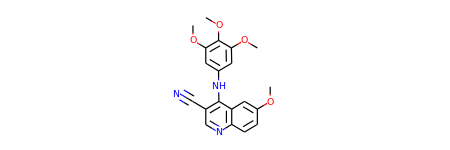

In [58]:
m1000[6]

In [60]:
import glob
import pandas as pd 

In [215]:
def get_ids(target="CHEMBL203", top=1000):
    fn = glob.glob("pred_files/%s/vs_chemdiv_*.pred1000" % target)[0]
    df = pd.read_csv(fn, sep="\t", header=None, names=["none", "id", target+"_pred"], index_col=0, usecols=[1, 2])
    df[target+"_index"] = range(1000)
    fn = glob.glob("pred_files/%s/vs_chemdiv_*top1000.sdf" % target)[0]
    suppl = Chem.SDMolSupplier(fn)
    for m in suppl:
        if m.HasProp("IDNUMBER"):
            df.loc[m.GetProp("IDNUMBER"), "mol"] = m
    return df.reset_index()

In [216]:
a = get_ids("CHEMBL203")
b = get_ids("CHEMBL267")
c = get_ids("CHEMBL279")

In [192]:
ac = a.merge(c, on="id")
ac

,id,CHEMBL203_pred,CHEMBL203_index,mol_x,CHEMBL279_pred,CHEMBL279_index,mol_y
0,3486-0358,0.431300,3,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a4e6e0>,0.105957,469,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a87280>
1,C066-4881,0.361765,10,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a4e9f0>,0.178109,188,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a96590>
2,G887-0362,0.299174,24,<rdkit.Chem.rdchem.Mol object at 0x7ffb189e7050>,0.099344,514,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a8d670>
3,3486-0421,0.291748,32,<rdkit.Chem.rdchem.Mol object at 0x7ffb189e73d0>,0.137190,298,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a97670>
4,G887-0379,0.262502,55,<rdkit.Chem.rdchem.Mol object at 0x7ffb189e7de0>,0.064254,993,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a73b40>
5,K405-2625,0.219095,121,<rdkit.Chem.rdchem.Mol object at 0x7ffb189b9b40>,0.065322,965,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a78ec0>
6,C431-0049,0.216677,127,<rdkit.Chem.rdchem.Mol object at 0x7ffb189b9de0>,0.258393,103,<rdkit.Chem.rdchem.Mol object at 0x7ffb189e1fa0>
7,3486-0393,0.186619,189,<rdkit.Chem.rdchem.Mol object at 0x7ffb189c3980>,0.077227,767,<rdkit.Chem.rdchem.Mol object at 0x7ffb18aa66e0>
8,G887-0295,0.163087,274,<rdkit.Chem.rdchem.Mol object at 0x7ffb189cef30>,0.095529,539,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a981a0>
9,S538-0617,0.148430,339,<rdkit.Chem.rdchem.Mol object at 0x7ffb189dec20>,0.069567,886,<rdkit.Chem.rdchem.Mol object at 0x7ffb18a71bb0>


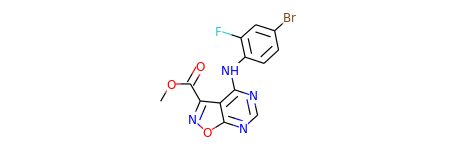

In [193]:
ac.loc[1]["mol_x"]

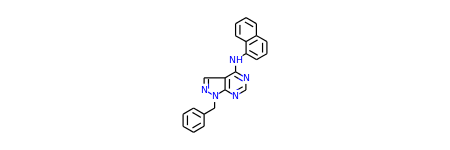

In [195]:
ac.loc[3]["mol_x"]

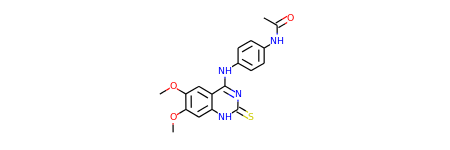

In [196]:
ac.loc[6]["mol_x"]

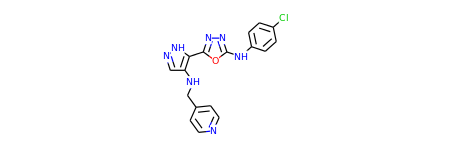

In [197]:
ac.loc[13]["mol_x"]

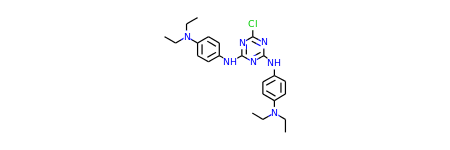

In [198]:
ac.loc[21]["mol_x"]

In [217]:
ab = a.merge(b, on="id")
ab

,id,CHEMBL203_pred,CHEMBL203_index,mol_x,CHEMBL267_pred,CHEMBL267_index,mol_y
0,3486-0358,0.431300,3,<rdkit.Chem.rdchem.Mol object at 0x7ffb188b7750>,0.248166,357,<rdkit.Chem.rdchem.Mol object at 0x7ffb189cec20>
1,F360-0628,0.297467,27,<rdkit.Chem.rdchem.Mol object at 0x7ffb188ce210>,0.133103,883,<rdkit.Chem.rdchem.Mol object at 0x7ffb189afc20>
2,C431-0073,0.292120,31,<rdkit.Chem.rdchem.Mol object at 0x7ffb188ce3d0>,0.135970,842,<rdkit.Chem.rdchem.Mol object at 0x7ffb189b09f0>
3,3486-0421,0.291748,32,<rdkit.Chem.rdchem.Mol object at 0x7ffb188ce440>,0.326512,234,<rdkit.Chem.rdchem.Mol object at 0x7ffb189bf520>
4,E939-0300,0.251230,73,<rdkit.Chem.rdchem.Mol object at 0x7ffb188cf670>,0.209726,470,<rdkit.Chem.rdchem.Mol object at 0x7ffb189e7830>
5,F360-0672,0.241129,87,<rdkit.Chem.rdchem.Mol object at 0x7ffb188cfc90>,0.131491,898,<rdkit.Chem.rdchem.Mol object at 0x7ffb189ad2f0>
6,E939-0340,0.210057,140,<rdkit.Chem.rdchem.Mol object at 0x7ffb188d2440>,0.212946,457,<rdkit.Chem.rdchem.Mol object at 0x7ffb189e7e50>
7,C660-0700,0.204045,148,<rdkit.Chem.rdchem.Mol object at 0x7ffb188d27c0>,0.126321,943,<rdkit.Chem.rdchem.Mol object at 0x7ffb189df6e0>
8,F360-0648,0.197876,159,<rdkit.Chem.rdchem.Mol object at 0x7ffb188d2c90>,0.224320,424,<rdkit.Chem.rdchem.Mol object at 0x7ffb189b9d70>
9,E939-0417,0.196403,162,<rdkit.Chem.rdchem.Mol object at 0x7ffb188d2de0>,0.215093,453,<rdkit.Chem.rdchem.Mol object at 0x7ffb189b9050>


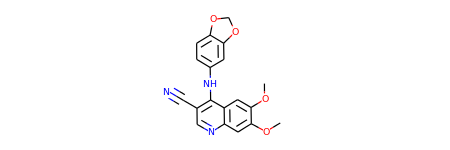

In [218]:
ab.loc[29]["mol_x"]

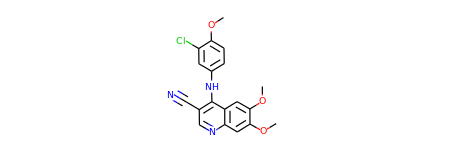

In [219]:
ab.loc[27]["mol_x"]

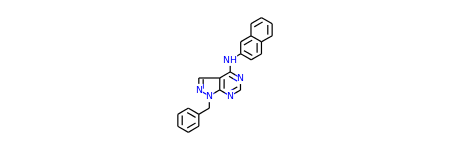

In [220]:
ab.loc[15]["mol_x"]

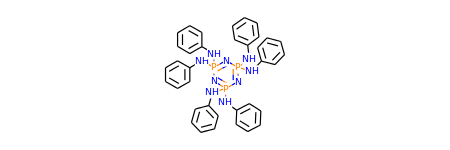

In [221]:
ab.loc[10]["mol_x"]

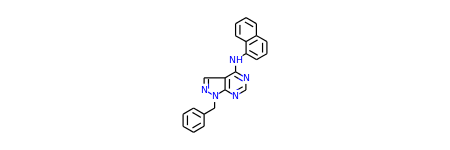

In [222]:
ab.loc[3]["mol_x"]

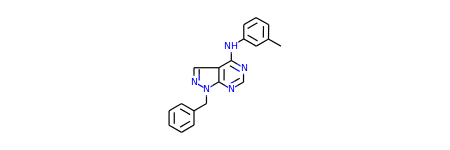

In [223]:
ab.loc[0]["mol_x"]